In [107]:
from cast_to_xarray import *
import cartopy.crs as ccrs
import cartopy.feature as cf

In [108]:
data_dir = 'data_cruise1'

cast4 = cast_to_xarray(data_dir+'/Station4_TSwift_loop_filter_teos10_bin.cnv', '4')
cast5 = cast_to_xarray(data_dir+'/Station5_loop_filter_teos10_bin.cnv', '5')
castWF = cast_to_xarray(data_dir+'/StationWF_loop_filter_teos10_bin.cnv', 'WF')
castRace = cast_to_xarray(data_dir+'/TheRace_loop_filter_teos10_bin.cnv', 'Race')

In [109]:
# combine all the casts into one xarray dataset
# combine in the order visited

ctdsection = xr.concat([castWF, cast5, cast4, castRace],"cast")
#ctdsection

In [110]:
extent = [-74,-71,40.3,41.7]

In [111]:
# Download ETOPO1 topography for the domain(this may take a minute)
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bat = xr.open_dataset(url)
bat = bat.sel(lon=slice(extent[0],extent[1]),lat=slice(extent[2],extent[3]))

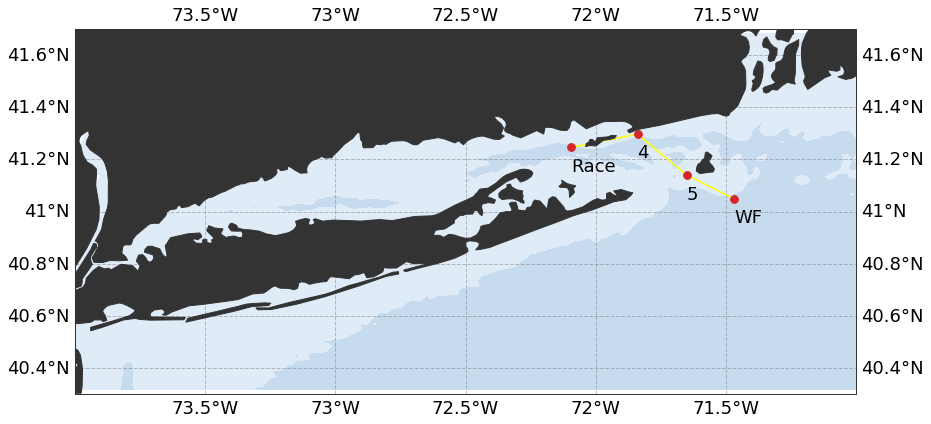

In [126]:
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(14, 17),
                           subplot_kw=dict(projection=projection))
ax.set_extent(extent)

# Plot topography
bat['topo'].plot.contourf(
        ax=ax,levels=np.linspace(-500,100,10),add_colorbar=False,extend='neither',cmap='Blues_r',transform=projection)

_ = ax.add_feature(cf.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face', facecolor='0.2'),
                                                zorder=3)

plt.plot(ctdsection.longitude.values,ctdsection.latitude.values, color=([1, 1, 0]))

# plot CTD stations
ctdsection.plot.scatter('longitude', 'latitude', color='tab:red',transform=projection, s=60, zorder=3)

plt.text(ctdsection.longitude.values[0],ctdsection.latitude.values[0]-.09,ctdsection.station.values[0],color='k',transform=projection,zorder=1)
plt.text(ctdsection.longitude.values[1],ctdsection.latitude.values[1]-.09,ctdsection.station.values[1],color='k',transform=projection,zorder=1)
plt.text(ctdsection.longitude.values[2],ctdsection.latitude.values[2]-.09,ctdsection.station.values[2],color='k',transform=projection,zorder=1)
plt.text(ctdsection.longitude.values[3],ctdsection.latitude.values[3]-.09,ctdsection.station.values[3],color='k',transform=projection,zorder=1)

# plot ADCP track
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')

plt.rcParams.update({'font.size': 18})

plt.savefig("Cruise1_map.png")

In [105]:
ctdsection

<xarray.Dataset>
Dimensions:       (cast: 4, depth: 159)
Coordinates:
  * depth         (depth) float64 1.5 2.0 2.5 3.0 3.5 ... 80.0 80.5 81.0 81.5
    latitude      (cast) float64 41.05 41.3 41.14 41.25
    longitude     (cast) float64 -71.47 -71.84 -71.65 -72.09
    station       (cast) <U4 'WF' '4' '5' 'Race'
Dimensions without coordinates: cast
Data variables:
    temperature   (cast, depth) float64 nan nan 19.38 ... 19.15 19.15 19.15
    salinity      (cast, depth) float64 nan nan 32.29 ... 31.71 31.71 31.71
    pressure      (cast, depth) float64 nan nan 2.52 3.024 ... 81.15 81.65 82.16
    fluorescence  (cast, depth) float64 nan nan 0.6045 ... 1.152 1.097 1.164
    oxygen        (cast, depth) float64 nan nan 239.3 ... 214.5 214.2 214.7
    pH            (cast, depth) float64 nan nan 8.167 8.167 ... 8.09 8.09 8.089